In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [95]:
train=pd.read_excel(r"Data_Train.xlsx")

In [96]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [98]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [99]:
train.dropna(inplace=True)

In [100]:
train["Journey_Day"]=pd.to_datetime(train["Date_of_Journey"],infer_datetime_format=True).dt.day

In [101]:
train["Journey_Month"]=pd.to_datetime(train["Date_of_Journey"],infer_datetime_format=True).dt.month

In [102]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [103]:
train.drop(["Date_of_Journey"],axis=1, inplace=True)

In [104]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [105]:
train["Dept_hour"]=pd.to_datetime(train["Dep_Time"]).dt.hour
train["Dept_min"]=pd.to_datetime(train["Dep_Time"]).dt.minute

In [106]:
train.drop(["Dep_Time"],axis=1, inplace=True)

In [107]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [108]:
train["Arrival_hour"]=pd.to_datetime(train["Arrival_Time"]).dt.hour
train["Arrival_min"]=pd.to_datetime(train["Arrival_Time"]).dt.minute
train.drop(["Arrival_Time"],axis=1, inplace=True)

In [109]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dept_hour,Dept_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [110]:
duration=list(train["Duration"])

In [111]:
print(duration[1].split("h")[0])
print(duration[1])

7
7h 25m


In [112]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           


In [113]:
duration_hour=[]
duration_min=[]

In [114]:
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split("h")[0]))
    duration_min.append(int(duration[0].split('m')[0].split()[1]))
    

In [115]:
train["Duration_hours"] = duration_hour
train["Duration_mins"] = duration_min

In [116]:
train.drop(["Duration"],axis=1, inplace=True)

In [117]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,50
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,50
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,50


In [118]:
train.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [119]:
Airline = train[["Airline"]]
Airline = pd.get_dummies(train["Airline"])
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [120]:
train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [121]:

Source = pd.get_dummies(train["Source"])
Source.head()

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [122]:

Destination = pd.get_dummies(train["Destination"])
Destination.head()

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [123]:
train["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [124]:
train.drop(["Additional_Info"],axis=1,inplace=True)

In [125]:
train["Route"].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → BOM → IXC → DEL             1
CCU → VTZ → BLR                   1
BLR → HBX → BOM → AMD → DEL       1
BOM → COK → MAA → HYD             1
BOM → JLR → HYD                   1
Name: Route, Length: 128, dtype: int64

In [126]:
train.drop(["Route"],axis=1,inplace=True)

In [127]:
train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [128]:
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [129]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,50
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,50
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,50
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,50


In [130]:
data_train = pd.concat([train, Airline, Source, Destination], axis = 1)

In [131]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [132]:
data_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,50,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,50,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,50,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,50,...,0,0,0,0,0,0,0,0,0,1


In [133]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 33 columns):
Total_Stops                          10682 non-null int64
Price                                10682 non-null int64
Journey_Day                          10682 non-null int64
Journey_Month                        10682 non-null int64
Dept_hour                            10682 non-null int64
Dept_min                             10682 non-null int64
Arrival_hour                         10682 non-null int64
Arrival_min                          10682 non-null int64
Duration_hours                       10682 non-null int64
Duration_mins                        10682 non-null int64
Air Asia                             10682 non-null uint8
Air India                            10682 non-null uint8
GoAir                                10682 non-null uint8
IndiGo                               10682 non-null uint8
Jet Airways                          10682 non-null uint8
Jet Airways Business 

In [134]:
test_data=pd.read_excel(r"Test_set.xlsx")

In [135]:

test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, infer_datetime_format=True).dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], infer_datetime_format=True).dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)


test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)


duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split("m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

Airline = pd.get_dummies(test_data["Airline"])

Source = pd.get_dummies(test_data["Source"])

Destination = pd.get_dummies(test_data["Destination"])

test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [136]:
data_train.shape

(10682, 33)

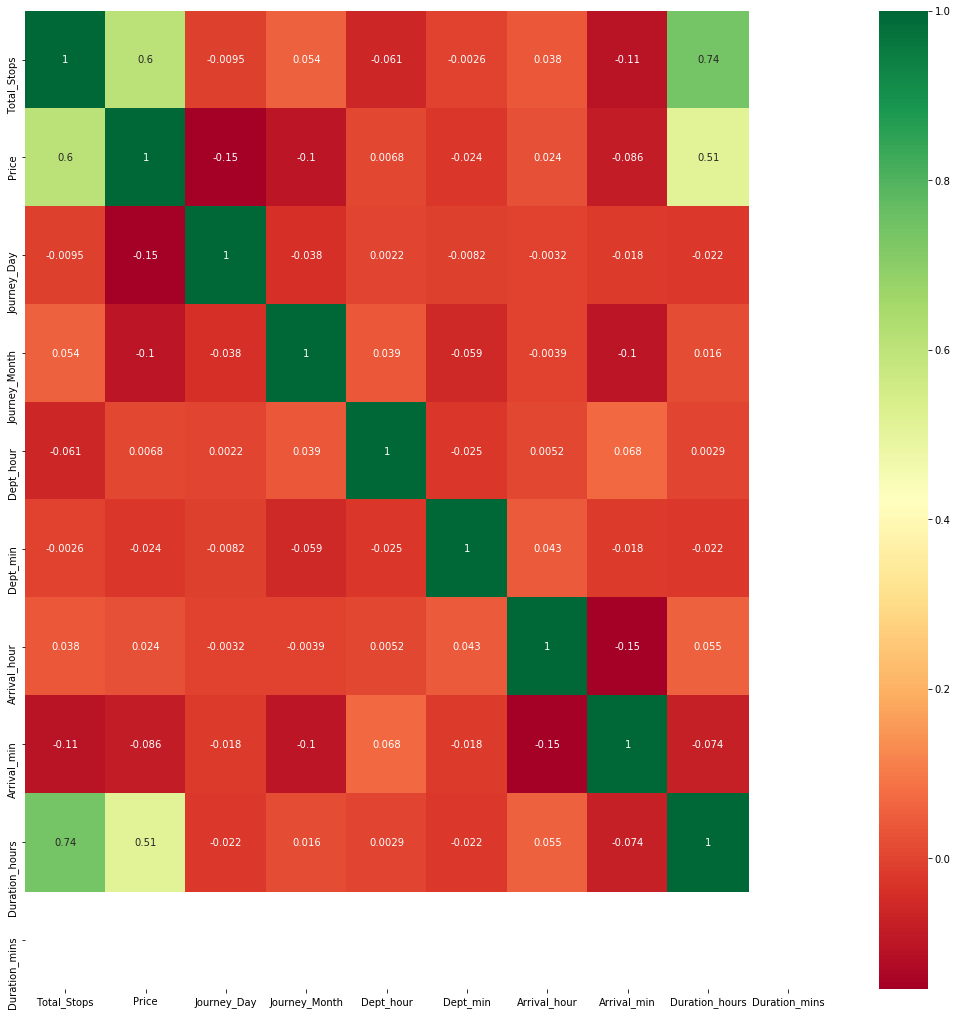

In [137]:
plt.figure(figsize=(18,18))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
data_train.drop(["Trujet"],axis=1,inplace=True)

In [140]:
Y=data_train.Price

In [141]:
Y=Y.values

In [142]:
data_train.drop(["Price"],axis=1,inplace=True)

In [143]:
X=data_train.values

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [145]:
lr=LinearRegression()

In [146]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
lr.score(X_test,y_test)

0.6150526224541497

In [148]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(max_depth=13,n_estimators=100)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=13, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [149]:
reg_rf.score(X_test,y_test)

0.8333629905630312

In [150]:
from sklearn.tree import DecisionTreeRegressor

In [158]:
dt=DecisionTreeRegressor(max_depth=10)

In [159]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [160]:
dt.score(X_test,y_test)

0.7645515929050481

In [154]:
from sklearn import tree

In [155]:
'''plt.figure(figsize=(25,25))
tree.plot_tree(dt,filled=True)'''

'plt.figure(figsize=(25,25))\ntree.plot_tree(dt,filled=True)'

In [156]:
from sklearn.externals import joblib

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [157]:
#joblib.dump(reg_rf,"model.pkl")